<a href="https://colab.research.google.com/github/Subhajitongit/kutta-billi/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:04<00:00, 279MB/s]
100% 1.06G/1.06G [00:04<00:00, 239MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 58s 91ms/step - loss: 0.5649 - accuracy: 0.6988 - val_loss: 0.5248 - val_accuracy: 0.7308
Epoch 2/5
625/625 [==============================] - 57s 91ms/step - loss: 0.4516 - accuracy: 0.7862 - val_loss: 0.4286 - val_accuracy: 0.7990
Epoch 3/5
625/625 [==============================] - 60s 95ms/step - loss: 0.3386 - accuracy: 0.8480 - val_loss: 0.5746 - val_accuracy: 0.7866
Epoch 4/5
625/625 [==============================] - 57s 91ms/step - loss: 0.2119 - accuracy: 0.9115 - val_loss: 0.7773 - val_accuracy: 0.7798
Epoch 5/5
625/625 [==============================] - 59s 94ms/step - loss: 0.1173 - accuracy: 0.9543 - val_loss: 0.9353 - val_accuracy: 0.7758


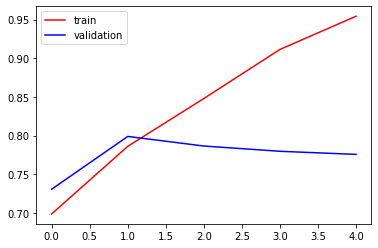

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

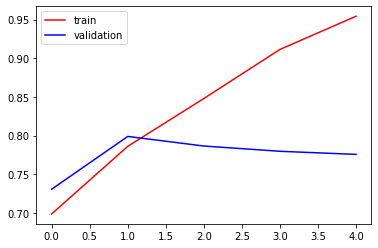

In [16]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

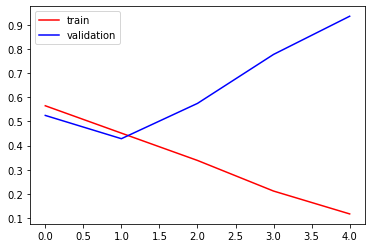

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
import cv2


In [32]:
test_img = cv2.imread('/content/dog.jpg')

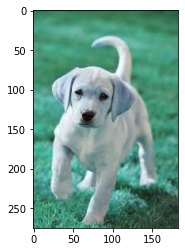

In [33]:
plt.imshow(test_img)


In [34]:
test_img.shape

(275, 183, 3)

In [35]:
test_img = cv2.resize(test_img,(256,256))


In [36]:
test_input = test_img.reshape((1,256,256,3))

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)